In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [3]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape

(145460, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
categorical =  [var  for var in df.columns if df[var].dtype == 'O']
print(categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
for col in df.columns:
    df[col] = df[col].fillna(method='ffill')

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      6049
Sunshine         6049
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'],axis=1,inplace=True)

In [12]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,8.0,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,8.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,8.0,2.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


## EDA

In [13]:
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'],axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

In [16]:
X_train['RainToday']

22926      No
80735      No
121764    Yes
139821     No
1867      Yes
         ... 
41993      No
97639      No
95939      No
117952    Yes
43567      No
Name: RainToday, Length: 116368, dtype: object

In [17]:
y.unique()

array(['No', 'Yes'], dtype=object)

## Categorical to Numerical

In [18]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'Month',
 'day']

In [19]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'],return_df = True) #binary encoder converts data into binary code[0,1].
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder() #LabelEncoder helps address this issue by mapping each category to a unique integer
X_train['Location'] = encoder.fit_transform(X_train['Location'])
X_test['Location'] = encoder.transform(X_test['Location'])
X_train['WindGustDir'] = encoder.fit_transform(X_train['WindGustDir'])
X_test['WindGustDir'] = encoder.transform(X_test['WindGustDir'])
X_train['WindDir9am'] = encoder.fit_transform(X_train['WindDir9am'])
X_test['WindDir9am'] = encoder.transform(X_test['WindDir9am'])
X_train['WindDir3pm'] = encoder.fit_transform(X_train['WindDir3pm'])
X_test['WindDir3pm'] = encoder.transform(X_test['WindDir3pm'])

X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,year,Month,day
22926,27,18.8,23.7,0.2,5.0,7.3,2,52.0,2,2,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,44,9.3,24.0,0.2,1.6,10.9,4,48.0,6,5,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,31,10.9,22.2,1.4,1.2,9.6,12,26.0,4,12,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,13,19.3,29.9,0.0,9.2,11.0,2,43.0,2,0,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,2,15.7,17.6,12.4,NaN,NaN,0,20.0,2,0,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


In [21]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,year,Month,day
22926,27,18.8,23.7,0.2,5.0,7.3,2,52.0,2,2,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,44,9.3,24.0,0.2,1.6,10.9,4,48.0,6,5,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,31,10.9,22.2,1.4,1.2,9.6,12,26.0,4,12,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,13,19.3,29.9,0.0,9.2,11.0,2,43.0,2,0,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,2,15.7,17.6,12.4,NaN,NaN,0,20.0,2,0,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


In [22]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,year,Month,day
138175,3,21.9,39.4,1.6,11.2,11.5,6,57.0,4,3,...,1004.1,2.0,6.0,29.8,35.4,1,0,2014,12,3
38638,42,20.5,37.5,0.0,9.2,8.4,14,59.0,1,3,...,1006.5,4.0,7.0,27.3,35.7,0,1,2015,1,8
124058,36,5.1,17.2,0.2,1.6,7.9,13,50.0,14,13,...,1026.0,1.0,3.0,10.1,16.1,0,1,2009,8,16
99214,0,11.9,16.8,1.0,0.6,6.7,12,28.0,14,12,...,1017.7,8.0,8.0,14.3,15.2,0,1,2016,8,31
25097,30,7.5,21.3,0.0,4.0,8.0,4,15.0,12,5,...,1014.2,7.0,2.0,13.7,21.1,0,1,2011,8,28


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  #MinMaxScaler helps in preventing certain features from dominating others in the dataset
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer  #simpleimputer is designed for handling missing data in datasets.

# Instantiate the logistic regression model
logreg = LogisticRegression(random_state=0)

# Instantiate the imputer with your chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit the model using the training data
logreg.fit(X_train, y_train)



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [37]:
# probability of getting output as 0 - no rain
logreg.predict_proba(X_test)[:,0]

array([0.80385113, 0.82442108, 0.92417422, ..., 0.55219858, 0.76263384,
       0.95030775])

In [38]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8417


In [39]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [40]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8407
Test set score: 0.8417


In [41]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix # confusion matrix means to evaluate the performance it has 4 components

cm = confusion_matrix(y_test, y_pred_test)
print (cm)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

[[21411  1146]
 [ 3460  3075]]
Confusion matrix

 [[21411  1146]
 [ 3460  3075]]

True Positives(TP) =  21411

True Negatives(TN) =  3075

False Positives(FP) =  1146

False Negatives(FN) =  3460


<Axes: >

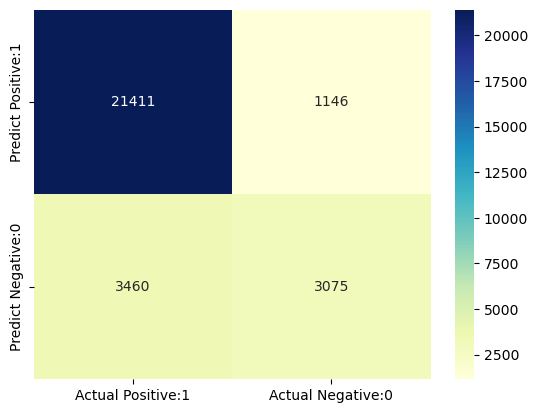

In [42]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22557
         Yes       0.73      0.47      0.57      6535

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [46]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [47]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8417


In [48]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7285


In [49]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores:[0.83827447 0.84149695 0.84338747 0.83770893 0.84063077]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
